# Day 32 – Sentiment Analysis on Customer Reviews
### Build a Machine Learning Classifier for Positive/Negative Sentiment

Today we will build a sentiment classifier using:
- Text preprocessing
- TF-IDF vectorization
- Logistic Regression model
- Evaluation metrics and visualization

This mirrors real-world customer review mining systems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import re

plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries loaded.")

Libraries loaded.


## 1. Create Synthetic Review/Tweet Dataset
Simulates real-world product reviews or tweets.

In [2]:
data = {
    "review": [
        "I absolutely loved the new update! Everything works flawlessly.",
        "Worst app ever. It keeps crashing every 10 minutes.",
        "Great customer support. They solved my issue instantly!",
        "Terrible experience. I want a refund immediately.",
        "The new UI is clean, fast, and intuitive. Great job team!",
        "The service is slow, laggy, and full of bugs.",
        "Amazing performance improvements after the patch.",
        "I hate the latest update, everything feels broken.",
        "Super helpful features added recently. Love it!",
        "The app freezes everytime I try to login. Horrible update."
    ],
    "sentiment": [1,0,1,0,1,0,1,0,1,0]   # 1 = positive, 0 = negative
}

df = pd.DataFrame(data)
df

,review,sentiment
0,I absolutely loved the new update! Everything ...,1
1,Worst app ever. It keeps crashing every 10 min...,0
2,Great customer support. They solved my issue i...,1
3,Terrible experience. I want a refund immediately.,0
4,"The new UI is clean, fast, and intuitive. Grea...",1
5,"The service is slow, laggy, and full of bugs.",0
6,Amazing performance improvements after the patch.,1
7,"I hate the latest update, everything feels bro...",0
8,Super helpful features added recently. Love it!,1
9,The app freezes everytime I try to login. Horr...,0


## 2. Text Cleaning Function
Lowercasing, removing non-alphabetic characters, etc.

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean'] = df['review'].apply(clean_text)
df[['review','clean','sentiment']]

,review,clean,sentiment
0,I absolutely loved the new update! Everything ...,i absolutely loved the new update everything w...,1
1,Worst app ever. It keeps crashing every 10 min...,worst app ever it keeps crashing every minutes,0
2,Great customer support. They solved my issue i...,great customer support they solved my issue in...,1
3,Terrible experience. I want a refund immediately.,terrible experience i want a refund immediately,0
4,"The new UI is clean, fast, and intuitive. Grea...",the new ui is clean fast and intuitive great j...,1
5,"The service is slow, laggy, and full of bugs.",the service is slow laggy and full of bugs,0
6,Amazing performance improvements after the patch.,amazing performance improvements after the patch,1
7,"I hate the latest update, everything feels bro...",i hate the latest update everything feels broken,0
8,Super helpful features added recently. Love it!,super helpful features added recently love it,1
9,The app freezes everytime I try to login. Horr...,the app freezes everytime i try to login horri...,0


## 3. TF-IDF Vectorization

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean'])
y = df['sentiment']

print(X.shape)

(10, 51)


## 4. Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape

((7, 51), (3, 51))

## 5. Train Logistic Regression Model

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained.")

Model trained.


## 6. Evaluate Model

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



c:\Users\vedav\OneDrive\Documents\LLM-Engineer\LLM-Engineer-Prerequisites\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vedav\OneDrive\Documents\LLM-Engineer\LLM-Engineer-Prerequisites\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vedav\OneDrive\Documents\LLM-Engineer\LLM-Engineer-Prerequisites\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

## 7. Confusion Matrix Visualization

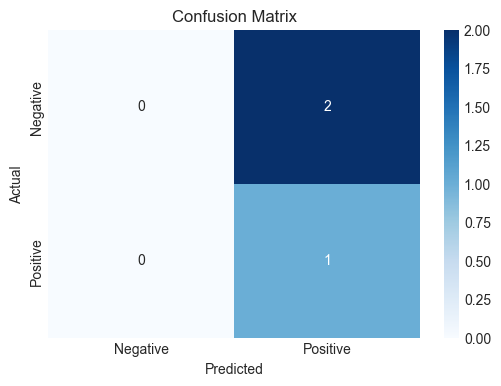

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 8. Test Model on Custom Reviews

In [9]:
def predict_sentiment(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

samples = [
    "This update is amazing! Super fast UI.",
    "The app crashes every time. Completely useless.",
    "Support team was helpful and quick."
]

for s in samples:
    print(s, "-->", predict_sentiment(s))

This update is amazing! Super fast UI. --> Positive
The app crashes every time. Completely useless. --> Positive
Support team was helpful and quick. --> Positive


## Summary
- Cleaned text data
- TF-IDF vectorized reviews
- Trained Logistic Regression sentiment classifier
- Evaluated model with accuracy and F1-score
- Tested model on custom review samples

**Deliverable:** `day32_sentiment_analysis.ipynb`